In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import cv2 as cv
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def kmeans_sklearns(img, clusters):
    # Convertir la imagen a una forma adecuada para K-Means
    image2 = img.reshape((-1, 3))

    # Aplicar K-Means de scikit-learn
    kmeans = KMeans(n_clusters=clusters, random_state=0)
    kmeans.fit(image2)

    # Obtener los centroides y las etiquetas
    centroids = kmeans.cluster_centers_
    labels = kmeans.labels_

    # Crear la imagen segmentada
    segmented_img = centroids[labels].reshape(img.shape)
    return np.uint8(segmented_img)

def kmeans_opencv(img, clusters):
    # Convertir la imagen a una forma adecuada para K-Means
    img2 = img.reshape((-1, 3)).astype(np.float32)

    # Definir los criterios de K-Means y aplicar K-Means de OpenCV
    criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    _, labels, centroids = cv.kmeans(img2, clusters, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)

    # Convertir los centroides a uint8
    centroids = np.uint8(centroids)

    # Crear la imagen segmentada
    segmented_img = centroids[labels.flatten()]
    segmented_img = segmented_img.reshape(img.shape)
    return segmented_img


In [7]:
# Ruta de la imagen
image_path = "/content/drive/MyDrive/Eafit - Semestre 10/Visión por computador/Talleres/Taller 5/descarga.jpg"

# Montar Google Drive para acceder a la imagen
from google.colab import drive
drive.mount('/content/drive')

# Cargar la imagen
image = cv.imread(image_path)

# Comprobar si la imagen se cargó correctamente
if image is None:
    print(f"Error: No se pudo cargar la imagen desde {image_path}")
else:
    # Segmentar la imagen usando scikit-learn y OpenCV
    clusters = 5  # Cambia el número de clusters según tus necesidades

    sk_segmented = kmeans_sklearns(image, clusters)
    ocv_segmented = kmeans_opencv(image, clusters)

    # Guardar las imágenes segmentadas
    cv.imwrite('/content/drive/MyDrive/Eafit - Semestre 10/Visión por computador/Talleres/Taller 5/segmentacion_sk.jpg', sk_segmented)
    cv.imwrite('/content/drive/MyDrive/Eafit - Semestre 10/Visión por computador/Talleres/Taller 5/segmentacion_cv.jpg', ocv_segmented)
    print("Las imágenes se han guardado")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Las imágenes se han guardado


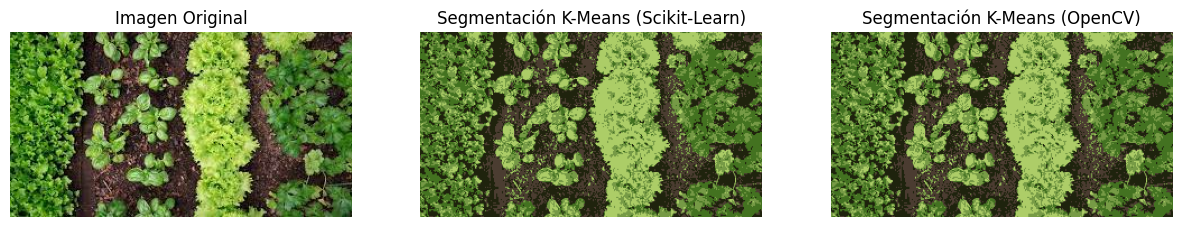

In [9]:
# Mostrar las imágenes originales y segmentadas
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(cv.cvtColor(sk_segmented, cv.COLOR_BGR2RGB))
plt.title('Segmentación K-Means (Scikit-Learn)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(cv.cvtColor(ocv_segmented, cv.COLOR_BGR2RGB))
plt.title('Segmentación K-Means (OpenCV)')
plt.axis('off')

plt.show()